### Baseline Regression model

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate, cross_val_score, learning_curve, ShuffleSplit, permutation_test_score

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [4]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

In [5]:
print(f"Shape of feature matrix is {features.shape}")
print(f"Shape of label vector is {labels.shape}")

Shape of feature matrix is (20640, 8)
Shape of label vector is (20640,)


In [6]:
assert (features.shape[0] == labels.shape[0])

In [7]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=42)

In [8]:
print(f"#trainings samples: {train_features.shape[0]}")
print(f"#test samples: {test_features.shape[0]}")

#trainings samples: 15480
#test samples: 5160


In [9]:
line_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("lin_reg", LinearRegression())])

In [10]:
lin_reg_cv_results = cross_validate(line_reg_pipeline, train_features, train_labels, cv=shuffle_split_cv, 
                                    scoring='neg_mean_absolute_error', return_train_score=True, return_estimator=True)

lin_reg_errors = pd.Series(-1 * lin_reg_cv_results['test_score'], name='Linear regression error')

lin_reg_errors

0    0.515917
1    0.531678
2    0.540924
3    0.528676
4    0.549056
5    0.525526
6    0.528934
7    0.535021
8    0.519714
9    0.542722
Name: Linear regression error, dtype: float64

#### median_mean_constant_quantile

In [11]:
def dummy_regressor_baseline(strategy, constant_val=None, quantile_val=None):
    baseline = DummyRegressor(strategy=strategy, constant=constant_val, quantile=quantile_val)
    baseline_cv_results = cross_validate(baseline, train_features, train_labels, cv=shuffle_split_cv, 
                                         scoring='neg_mean_absolute_error')
    return pd.Series(-1 * baseline_cv_results['test_score'], name='Dummy regression error')

In [12]:
baseline_median_cv_results_errors = dummy_regressor_baseline(strategy='median')
baseline_mean_cv_results_errors = dummy_regressor_baseline(strategy='mean')
baseline_constant_cv_results_errors = dummy_regressor_baseline(strategy='constant', constant_val=2)  # predicts all labels as 2
baseline_quantile_cv_results_errors = dummy_regressor_baseline(strategy='quantile', quantile_val=0.55)

Text(0.5, 1.0, 'Distribution of test errors')

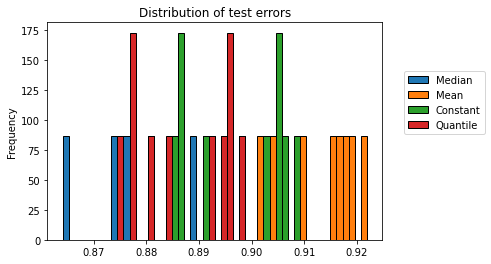

In [13]:
dummy_error_df = pd.concat([baseline_median_cv_results_errors,
                           baseline_mean_cv_results_errors,
                           baseline_constant_cv_results_errors,
                           baseline_quantile_cv_results_errors], axis=1)
dummy_error_df.columns = ['Median', 'Mean', 'Constant', 'Quantile'] #cross validation errors

dummy_error_df.plot.hist(bins=50, density=True, edgecolor='black')
plt.legend(bbox_to_anchor=(1.05,0.8), loc='upper left')
plt.title("Distribution of test errors")

Median and Quantile errors are lesser, in comparison to the Constant and Mean errors.

#### permutation_test

Permutes the target to generate randomized data and computes empirical p-value against the null hypothesis that features and targets are independent.

In [14]:
score, permutation_score, pvalue = permutation_test_score(line_reg_pipeline, train_features, train_labels, cv=shuffle_split_cv,
                                                         scoring='neg_mean_absolute_error', n_permutations=30)

permutation_errors = pd.Series(-1 * permutation_score, name='Permuted error')

In [15]:
permutation_score

array([-0.91446539, -0.91608713, -0.91501122, -0.91112203, -0.91326112,
       -0.91428719, -0.91694297, -0.90660687, -0.90873595, -0.91546138,
       -0.9084695 , -0.91174023, -0.91857102, -0.91467076, -0.90396709,
       -0.91239289, -0.91095499, -0.91729623, -0.90529415, -0.91436609,
       -0.91993036, -0.91661883, -0.91104746, -0.91563156, -0.91014294,
       -0.91526135, -0.90680247, -0.90796435, -0.91032999, -0.91545574])

#### Comparison of models

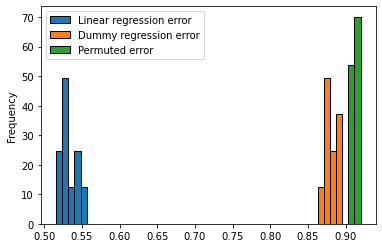

In [16]:
error_df = pd.concat([lin_reg_errors, baseline_median_cv_results_errors, permutation_errors], axis=1)
error_df.plot.hist(bins=50, density=True, edgecolor='black')
plt.legend(loc='best')

Our model has better performance than the two baselines.  However, it needs to improve further.

### Linear Regression

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate, cross_val_score, learning_curve, ShuffleSplit

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
np.random.seed(42)
plt.style.use('seaborn')

In [19]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [20]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

In [21]:
print(f"Shape of feature matrix is {features.shape}")
print(f"Shape of label vector is {labels.shape}")

Shape of feature matrix is (20640, 8)
Shape of label vector is (20640,)


In [22]:
assert (features.shape[0] == labels.shape[0])

In [23]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=42)

In [24]:
print(f"#trainings samples: {train_features.shape[0]}")
print(f"#test samples: {test_features.shape[0]}")

#trainings samples: 15480
#test samples: 5160


In [25]:
line_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("lin_reg", LinearRegression())])

line_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [26]:
print(f"Intercept(w0): {line_reg_pipeline[-1].intercept_}")
print(f"weight vector(w1, w2, ..., wm): {line_reg_pipeline[-1].coef_}")

Intercept(w0): 2.0703489205426377
weight vector(w1, w2, ..., wm): [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


In [27]:
# Evaluation on model
test_score = line_reg_pipeline.score(test_features, test_labels)
print(f"Model performance on test set: {test_score}")

train_score = line_reg_pipeline.score(train_features, train_labels)
print(f"Model performance on train set: {train_score}")

Model performance on test set: 0.5910509795491352
Model performance on train set: 0.609873031052925


Low r2 score points to underfitting

TO confirm the score, let's calculate the cross_validation score

In [28]:
lin_reg_score = cross_val_score(line_reg_pipeline, train_features, train_labels, scoring='neg_mean_squared_error', cv=shuffle_split_cv)

print(lin_reg_score) # this is a list of 10 scores, since the Shuffle split performed 10 splits.
print(f"Score of linear regression model on test set:\n {lin_reg_score.mean()} +/- {lin_reg_score.std()}")

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]
Score of linear regression model on test set:
 -0.5287517875396764 +/- 0.022232904569798696


In [29]:
lin_reg_mse = -lin_reg_score
print(f"MSE of linear regression model on test set:\n {lin_reg_mse.mean()} +/- {lin_reg_mse.std()}")

MSE of linear regression model on test set:
 0.5287517875396764 +/- 0.022232904569798696


Alternatively, use cross_validate API.  This can return the models trained on each fold with train error for that fold.

In [30]:
lin_reg_cv_results = cross_validate(line_reg_pipeline, train_features, train_labels, cv=shuffle_split_cv, 
                                    scoring='neg_mean_squared_error', return_train_score=True, return_estimator=True)

In [31]:
lin_reg_cv_results # There are 10 values for each key, one for each fold.

{'fit_time': array([0.00805473, 0.00782704, 0.00747681, 0.00698161, 0.00747108,
        0.0065167 , 0.0068891 , 0.00839901, 0.00754571, 0.00668097]),
 'score_time': array([0.0026021 , 0.00199676, 0.00196195, 0.00173378, 0.00197339,
        0.00200558, 0.00195932, 0.00179935, 0.00197172, 0.00185919]),
 'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('featu

In [32]:
train_error = -1 * lin_reg_cv_results['train_score']
test_error = -1 * lin_reg_cv_results['test_score']

print(f'Mean squared error of linear regression model on the training set is {train_error.mean()} +/- {train_error.std()}')
print(f'Mean squared error of linear regression model on the test set is {test_error.mean()} +/- {test_error.std()}')

Mean squared error of linear regression model on the training set is 0.5186840759388985 +/- 0.0055522490673909275
Mean squared error of linear regression model on the test set is 0.5287517875396764 +/- 0.022232904569798696


In [33]:
train_features.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

<AxesSubplot:>

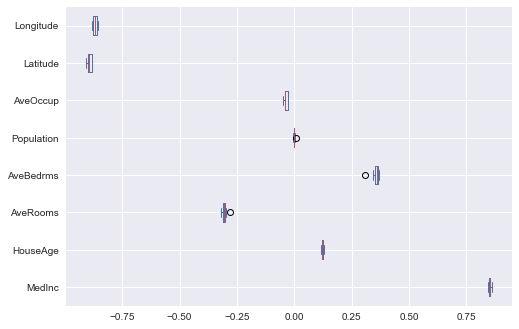

In [34]:
coefs = [est[-1].coef_ for est in lin_reg_cv_results['estimator']]
weights_df = pd.DataFrame(coefs, columns=train_features.columns)

weights_df.plot.box(vert=False)

In [35]:
weights_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844


Note that variance of the features AveRooms and AveBedrms are higher than the others.  Also, Population seems to have outliers, since the 75% percentile is significantly different from the max value.

In order to the find the best model, locate the estimator among all the folds that returned the least test error

In [36]:
test_error

array([0.50009976, 0.52183352, 0.55931218, 0.52110499, 0.56059203,
       0.50510767, 0.52386194, 0.54775518, 0.5007161 , 0.54713448])

In [37]:
selected_model = lin_reg_cv_results['estimator'][np.argmin(test_error)]

The model coefficients of the best model are:

In [38]:
print(f"Intercept(w0): {selected_model[-1].intercept_}")
print(f"Intercept(w0): {selected_model[-1].coef_}")

Intercept(w0): 2.0779898917958657
Intercept(w0): [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


See how the actual and predicted labels for the training set differs

Text(0.5, 1.0, 'Mean squared error = 0.52')

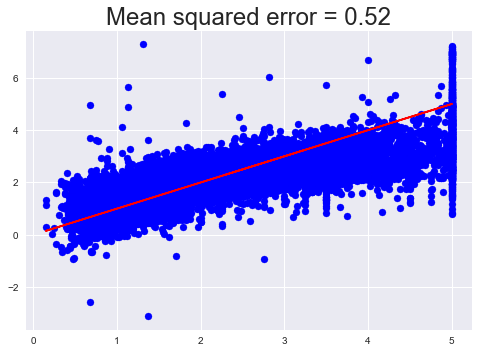

In [39]:
from sklearn.model_selection import cross_val_predict

cv_predictions = cross_val_predict(line_reg_pipeline, train_features, train_labels)
plt.scatter(train_labels, cv_predictions, color='blue')
plt.plot(train_labels, train_labels, 'r-')

mse_cv = mean_squared_error(train_labels, cv_predictions)
plt.title(f"Mean squared error = {mse_cv:.2f}", size=24)

Once the final model has been selected, use it to predict on test_features

In [40]:
test_predictions_cv = selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

Compare the above with the predictions on same test_features we built without cross-validation

In [41]:
test_predictions = line_reg_pipeline.predict(test_features)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

In [42]:
# Evaluation on the selected model
test_score = selected_model.score(test_features, test_labels)
print(f"Model performance on test set: {test_score}")

train_score = selected_model.score(train_features, train_labels)
print(f"Model performance on train set: {train_score}")

Model performance on test set: 0.5923577635319088
Model performance on train set: 0.6098001134259827


In [43]:
# Evaluation on original model (without cross-validation).  This was calculated above also
test_score = line_reg_pipeline.score(test_features, test_labels)
print(f"Model performance on test set: {test_score}")

train_score = line_reg_pipeline.score(train_features, train_labels)
print(f"Model performance on train set: {train_score}")

Model performance on test set: 0.5910509795491352
Model performance on train set: 0.609873031052925


Note that the test scores are marginally higher with cross validation

In [44]:
result = learning_curve(line_reg_pipeline, train_features, train_labels, cv=shuffle_split_cv, scoring='neg_mean_squared_error', 
                        n_jobs=-1, return_times=True, train_sizes=np.linspace(0.2, 1.0, 10))
                        
(train_sizes, train_scores, test_scores, fit_times, score_times) = result
                        
for (size, train_score, test_score) in zip(train_sizes, train_scores, test_scores):
    print(f"For a training set with {size} samples:\n",
          f"\t\ttrain score is {[round(each,3) for each in train_score]}\n",
          f"\t\ttest score is {[round(each,3) for each in test_score]}")

For a training set with 2476 samples:
 		train score is [-0.497, -0.47, -0.445, -0.488, -0.485, -0.51, -0.475, -0.51, -0.455, -0.449]
 		test score is [-0.508, -2.848, -0.525, -0.522, -0.566, -30.543, -0.528, -0.569, -24.533, -2.647]
For a training set with 3577 samples:
 		train score is [-0.496, -0.501, -0.449, -0.5, -0.498, -0.513, -0.503, -0.508, -0.472, -0.456]
 		test score is [-0.506, -0.526, -0.525, -0.522, -0.565, -21.847, -0.525, -0.554, -19.319, -2.18]
For a training set with 4678 samples:
 		train score is [-0.505, -0.516, -0.49, -0.512, -0.509, -0.513, -0.505, -0.508, -0.485, -0.525]
 		test score is [-0.505, -0.522, -0.559, -0.521, -0.565, -13.683, -0.523, -0.554, -24.286, -0.547]
For a training set with 5779 samples:
 		train score is [-0.513, -0.518, -0.489, -0.515, -0.511, -0.511, -0.519, -0.512, -0.482, -0.527]
 		test score is [-0.504, -0.521, -0.559, -0.522, -0.563, -18.132, -0.522, -0.551, -25.942, -0.548]
For a training set with 6880 samples:
 		train score is [-0

### SGDRegressor

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import cross_validate, cross_val_score, learning_curve, ShuffleSplit, validation_curve

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
np.random.seed(306)
plt.style.use('seaborn')

In [47]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [48]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

In [49]:
print(f"Shape of feature matrix is {features.shape}")
print(f"Shape of label vector is {labels.shape}")

Shape of feature matrix is (20640, 8)
Shape of label vector is (20640,)


In [50]:
assert (features.shape[0] == labels.shape[0])

In [51]:
from sklearn.model_selection import train_test_split
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)

In [52]:
print(f"#complete trainings samples: {com_train_features.shape[0]}")
print(f"#test samples: {test_features.shape[0]}")

#complete trainings samples: 15480
#test samples: 5160


Complete training set is further divided into train and dev (used to tune hyper-parameters)

In [53]:
train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels, random_state=42)

In [54]:
print(f"#trainings samples: {train_features.shape[0]}")
print(f"#dev samples: {dev_features.shape[0]}")
print(f"#test samples: {test_features.shape[0]}")

#trainings samples: 11610
#dev samples: 3870
#test samples: 5160


#### Baseline SGDRegressor

In [55]:
sgd = SGDRegressor(random_state=42)
sgd.fit(train_features, train_labels)
train_mae = mean_absolute_error(train_labels, sgd.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd.predict(dev_features))
print(train_mae, dev_mae)

309190327803747.2 311959782899622.1


Errors are too high, perhaps due to large learning rate.  Let's try with a feature scaling step before fitting the model

In [56]:
sgd_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("sgd", SGDRegressor(random_state=42))])

In [57]:
sgd_pipeline.fit(train_features, train_labels)
train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print(train_mae, dev_mae)

0.7263733471565367 1.0129611556669136


#### Step-wise training of SGDRegressor

In [58]:
eta0 = 1e-2
sgd_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("sgd", SGDRegressor(max_iter=1, warm_start=True, random_state=42))])

Text(0.5, 1.0, 'Learning curve: eta0=0.01')

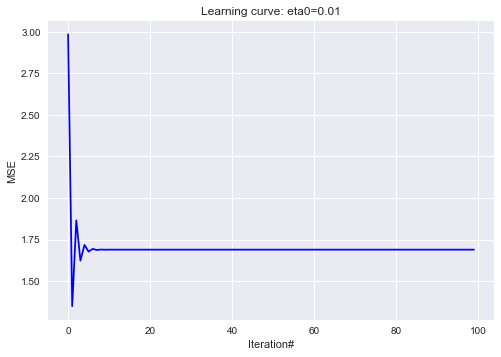

In [59]:
loss = []
for epoch in range(100):
    sgd_pipeline.fit(train_features, train_labels)
    loss.append(mean_squared_error(train_labels, sgd_pipeline.predict(train_features)))

plt.plot(np.arange(len(loss)), loss, 'b-')
plt.xlabel('Iteration#')
plt.ylabel('MSE')
plt.title(f'Learning curve: eta0={eta0}')

Let's reduce the training rate

In [60]:
eta0 = 1e-3
sgd_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("sgd", SGDRegressor(max_iter=1, warm_start=True, eta0=eta0, random_state=42))])

Text(0.5, 1.0, 'Learning curve: eta0=0.001')

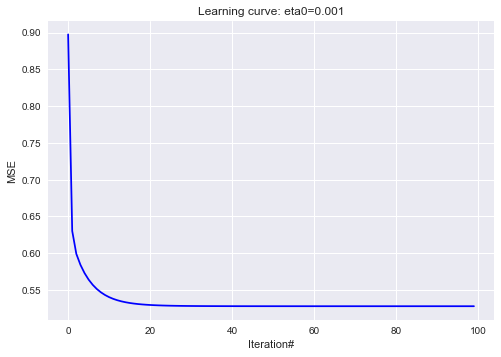

In [61]:
loss = []
for epoch in range(100):
    sgd_pipeline.fit(train_features, train_labels)
    loss.append(mean_squared_error(train_labels, sgd_pipeline.predict(train_features)))

plt.plot(np.arange(len(loss)), loss, 'b-')
plt.xlabel('Iteration#')
plt.ylabel('MSE')
plt.title(f'Learning curve: eta0={eta0}')

This is an ideal learning curve as the training loss reduces monotonically, as the training progresses

In [62]:
print(f"#Iterations before reaching convergence {sgd_pipeline[-1].n_iter_}")
print(f"#Weight updates {sgd_pipeline[-1].t_}")

#Iterations before reaching convergence 1
#Weight updates 11611.0



#### Finding the best eta0 using validation_curve

In [63]:
eta0 = [1e-5, 1e-4, 1e-3, 1e-2]
train_scores, test_scores = validation_curve(sgd_pipeline, com_train_features, com_train_labels, cv=shuffle_split_cv, 
                                             param_name='sgd__eta0', param_range=eta0, scoring='neg_mean_squared_error')
train_errors, test_errors = -train_scores, -test_scores

Text(0.5, 1.0, 'Validation curve for SGD')

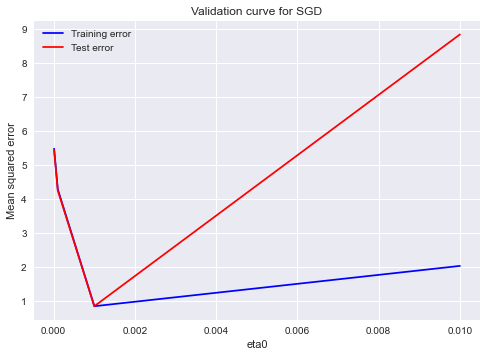

In [64]:
plt.plot(eta0, train_errors.mean(axis=1), 'b-x', label='Training error')
plt.plot(eta0, test_errors.mean(axis=1), 'r-x', label='Test error')
plt.legend()

plt.xlabel('eta0')
plt.ylabel('Mean squared error')
plt.title('Validation curve for SGD')

Since test error is least at 0.001, it's the best value for eta0

#### SGDRegressor (using the inverse scaling learning rate)

In [65]:
sgd_pipeline = Pipeline([('feature_scaling', StandardScaler()),
                        ('sgd', SGDRegressor(max_iter=500, early_stopping=True, eta0=1e-3,tol=1e-3, validation_fraction=0.2, n_iter_no_change=5, 
                                             average=10, random_state=42))])
sgd_pipeline.fit(train_features, train_labels)

train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print(train_mae, dev_mae)

0.579376454514559 0.5689180241137523


In [66]:
print(f'#Iterations: {sgd_pipeline[-1].n_iter_}')
print(f'#Weight updates: {sgd_pipeline[-1].t_}')

#Iterations: 7
#Weight updates: 81271.0


#### SGDRegressor (using the constant learning rate)

In [67]:
sgd_pipeline = Pipeline([('feature_scaling', StandardScaler()),
                        ('sgd', SGDRegressor(max_iter=500, early_stopping=True, eta0=1e-3,tol=1e-3, validation_fraction=0.2, n_iter_no_change=5, 
                                             average=10, learning_rate='constant', random_state=42))])
sgd_pipeline.fit(train_features, train_labels)

train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print(train_mae, dev_mae)

0.5359339681114987 0.5151099728924144


In [68]:
print(f'#Iterations: {sgd_pipeline[-1].n_iter_}')
print(f'#Weight updates: {sgd_pipeline[-1].t_}')

#Iterations: 8
#Weight updates: 92881.0


#### SGDRegressor (using the adaptive learning rate)

In [69]:
sgd_pipeline = Pipeline([('feature_scaling', StandardScaler()),
                        ('sgd', SGDRegressor(max_iter=500, early_stopping=True, eta0=1e-3,tol=1e-3, validation_fraction=0.2, n_iter_no_change=5, 
                                             average=10, learning_rate='adaptive', random_state=42))])
sgd_pipeline.fit(train_features, train_labels)

train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print(train_mae, dev_mae)

0.5340193046836148 0.5198356196858102


In [70]:
print(f'#Iterations: {sgd_pipeline[-1].n_iter_}')
print(f'#Weight updates: {sgd_pipeline[-1].t_}')

#Iterations: 33
#Weight updates: 383131.0


#### SGDRegressor (using the constant learning rate and optimum max_iter)

In [71]:
max_iter = np.ceil(1e6 / com_train_features.shape[0])
max_iter

65.0

In [72]:
sgd_pipeline = Pipeline([('feature_scaling', StandardScaler()),
                        ('sgd', SGDRegressor(max_iter=max_iter, early_stopping=True, eta0=1e-3,tol=1e-3, validation_fraction=0.2, n_iter_no_change=5, 
                                             average=10, learning_rate='constant', random_state=42))])
sgd_pipeline.fit(train_features, train_labels)

train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print(train_mae, dev_mae)

0.5359339681114987 0.5151099728924144


In [73]:
print(f'#Iterations: {sgd_pipeline[-1].n_iter_}')
print(f'#Weight updates: {sgd_pipeline[-1].t_}')

#Iterations: 8
#Weight updates: 92881.0
